# Chapter 1: Digital Attack on Pneumonia Detection Model


The foolowing two types of adversarial attacks will be carried out on a VGG16 based pneumonia detection model:
 1. Fast Gradient Sign Method (FGSM)
 2. Projected Gradient Descent  (PGD) 


---
## Prerequisites
### Loading data and the white box pneumonia detection model


In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
import tensorflow
print(tensorflow.__version__)

1.15.2


In [3]:
!pip install 'h5py<3.0.0'

In [4]:
from google.colab import files
uploaded = files.upload()

Saving pediatric pneumonia dataset_resized_150_150.zip to pediatric pneumonia dataset_resized_150_150.zip


In [5]:
from google.colab import files
uploaded = files.upload()

Saving VGG16_pediatric cxr dataset_Last_Two_Conv_Blocks_Fine_Tuned.h5 to VGG16_pediatric cxr dataset_Last_Two_Conv_Blocks_Fine_Tuned.h5


In [6]:
!unzip 'pediatric pneumonia dataset_resized_150_150.zip'

Streaming output truncated to the last 5000 lines.
  inflating: pediatric pneumonia dataset_resized_150_150/train/NORMAL/train_normal1210.jpeg  
  inflating: pediatric pneumonia dataset_resized_150_150/train/NORMAL/train_normal1211.jpeg  
  inflating: pediatric pneumonia dataset_resized_150_150/train/NORMAL/train_normal1212.jpeg  
  inflating: pediatric pneumonia dataset_resized_150_150/train/NORMAL/train_normal1213.jpeg  
  inflating: pediatric pneumonia dataset_resized_150_150/train/NORMAL/train_normal1214.jpeg  
  inflating: pediatric pneumonia dataset_resized_150_150/train/NORMAL/train_normal1215.jpeg  
  inflating: pediatric pneumonia dataset_resized_150_150/train/NORMAL/train_normal1216.jpeg  
  inflating: pediatric pneumonia dataset_resized_150_150/train/NORMAL/train_normal1217.jpeg  
  inflating: pediatric pneumonia dataset_resized_150_150/train/NORMAL/train_normal1218.jpeg  
  inflating: pediatric pneumonia dataset_resized_150_150/train/NORMAL/train_normal1219.jpeg  
  inflati

In [7]:
import glob
from pathlib import Path
from tensorflow.keras.utils import to_categorical
import cv2
import numpy as np

normal_dir = Path('/content/pediatric pneumonia dataset_resized_150_150/train/NORMAL')
pneumonia_dir = Path('/content/pediatric pneumonia dataset_resized_150_150/train/PNEUMONIA')

normal_cases = normal_dir.glob('*.jpeg')
pneumonia_cases = pneumonia_dir.glob('*.jpeg')

train_data = []
train_labels = []

for img in normal_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [0]
    train_data.append(img)
    train_labels.append(label)

for img in pneumonia_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [1]
    train_data.append(img)
    train_labels.append(label)

train_data = np.array(train_data)
train_labels = np.array(train_labels)
train_labels_one_hot_encoding=to_categorical(train_labels)

print("Total number and shape of train examples: ", train_data.shape)
print("Total number and shape of train labels:", train_labels.shape)

Total number and shape of train examples:  (5216, 150, 150, 3)
Total number and shape of train labels: (5216, 1)


In [8]:
normal_dir = Path('/content/pediatric pneumonia dataset_resized_150_150/test/NORMAL')
pneumonia_dir = Path('/content/pediatric pneumonia dataset_resized_150_150/test/PNEUMONIA')

normal_cases = normal_dir.glob('*.jpeg')
pneumonia_cases = pneumonia_dir.glob('*.jpeg')

test_data = []
test_labels = []

for img in normal_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [0]
    test_data.append(img)
    test_labels.append(label)

for img in pneumonia_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [1]
    test_data.append(img)
    test_labels.append(label)

test_data = np.array(test_data)
test_labels = np.array(test_labels)
test_labels_one_hot_encoding=to_categorical(test_labels)

print("Total number and shape of test examples: ", test_data.shape)
print("Total number and shape of test labels:", test_labels.shape)

Total number and shape of test examples:  (624, 150, 150, 3)
Total number and shape of test labels: (624, 1)


In [9]:
normal_dir = Path('/content/pediatric pneumonia dataset_resized_150_150/val/NORMAL')
pneumonia_dir = Path('/content/pediatric pneumonia dataset_resized_150_150/val/PNEUMONIA')

normal_cases = normal_dir.glob('*.jpeg')
pneumonia_cases = pneumonia_dir.glob('*.jpeg')

val_data = []
val_labels = []

for img in normal_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [0]
    val_data.append(img)
    val_labels.append(label)

for img in pneumonia_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [1]
    val_data.append(img)
    val_labels.append(label)

val_data = np.array(val_data)
val_labels = np.array(val_labels)
val_labels_one_hot_encoding=to_categorical(val_labels)

print("Total number and shape of validation examples: ", val_data.shape)
print("Total number and shape of validation labels:", val_labels.shape)

Total number and shape of validation examples:  (16, 150, 150, 3)
Total number and shape of validation labels: (16, 1)


In [10]:
# define class labels and number of classes
class_list = ["normal", "pneumonia"]
num_classes = 2

# define width, height and dimension of images
w, h, d = 150, 150, 3

x_train=train_data
y_train=train_labels_one_hot_encoding

x_test=test_data
y_test=test_labels_one_hot_encoding

x_val=val_data
y_val=val_labels_one_hot_encoding

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_val.shape[0], 'validation samples')

x_train shape: (5216, 150, 150, 3)
5216 train samples
624 test samples
16 validation samples


In [11]:
import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, Dropout
import numpy as np
from keras.datasets import cifar10
import os
import tensorflow as tf
import keras.backend as k
from keras.applications.vgg16 import VGG16
from keras.engine import Model
import matplotlib.pyplot as plt
import seaborn as sns
import time
from tqdm.notebook import trange

Using TensorFlow backend.


### Load the white-box model
Have a look at [Creating your white box model](./Finetuning.ipynb) if you want to attack your own model.

In [12]:
model = load_model("/content/VGG16_pediatric cxr dataset_Last_Two_Conv_Blocks_Fine_Tuned.h5")
print(f"Model accuracy on train data: {model.evaluate(x_train, y_train)[1]}")
print(f"Model accuracy on test test: {model.evaluate(x_test, y_test)[1]}")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


5216/5216 [==============================] - 33s 6ms/step
Model accuracy on train data: 0.9861963391304016
624/624 [==============================] - 4s 7ms/step
Model accuracy on test test: 0.9278846383094788


### Plot function
This function receives some images, lets the passed model predict on them and plots the images with their model prediction.

In [13]:
def plot_images(images, columns, rows, title, model, targets=None, gt=None, size=(15, 8)):
    
    """
    This function is used to plot images with their corresponding model prediction
    :param images:        some images
    :param columns:       cols of figure
    :param rows:          rows of figure
    :param title:         title of figure
    :param model:         model to predict the class labels
    :param target:        target lists
    :param gt:            ground truth labels
    """
    
    sns.set_style("whitegrid", {'axes.grid' : False})
    
    # create figre
    fig=plt.figure(figsize=size)
    plt.suptitle(title, fontsize=16)
    columns = columns
    rows = rows
    
    # for each image, let the model predict its class label
    for i in range(1, columns*rows +1):
        
        # let model predict
        img = images[i-1]
        fig.add_subplot(rows, columns, i)
        pred = model.predict(images[i-1].reshape(1, w, h, d))
        pred_class = class_list[np.argmax(pred.flatten())]
        pred_class_conf_prob = max(pred.flatten())
        
        # plot different things depending on the passed arguments
        if targets is not None:
            pred_target_class = max(pred.flatten()*targets[i-1])
            plt.title(f"{pred_class} ({pred_class_conf_prob:.2f})\nTarget: {pred_target_class:.2f}")
        elif gt is not None:
            plt.title(f"{pred_class} ({pred_class_conf_prob:.2f})\nG.T.: {gt[i-1]}")
        else:
            plt.title(f"{pred_class} ({pred_class_conf_prob:.2f})")
            
        plt.imshow(img)
    plt.show()

    
def plot_bar(eps, eps_step, n_steps, gt):
    """
    Generate a horizontal bar plot to show how often we had to add the noise
    in case of the minimal attack method
    :param eps:        maximum amount of noise
    :param eps_step:   noise per step
    :param n_steps:    results from attack
    :param gt:         gt label
    """
    sns.set()
    
    plt.title("Amount of noise added to the image")
    plt.ylabel("Initial Image")
    plt.xlabel("Number of steps")
    y_pos = np.arange(len(gt))

    # Create horizontal bars
    plt.barh(y_pos, n_steps)

    # Create names on the y-axis
    plt.yticks(y_pos, gt)
    plt.xlim(0, int(eps/eps_step))
    plt.xticks(np.arange(0, int(eps/eps_step)+1, 1))
    # Show graphic
    plt.show()

___
## Attack Classes

### Parent Class
This is our base gradient attack class. The FGSM and the PGD inherit from this class.
You can specify a range for clipping the final images. By default this is set to the range $[0, 1]$ because this is the valid float range for images. There are methods for building the tensorflow graph, computing the gradients and perturbation, applying the perturbation and clipping the noise values. Have a closer look at the implementation. We've commented all important parts.

In [14]:
class GradientAttack():
    """
    Base class for gradient attack. Builds graph of operations and defines function for calculating the gradient
    """
    
    
    def __init__(self, classifier, clip):
        """
        Initialize the class variables
        :parm classifier:    This is the model we want to attack
        :clip clip:          Range to clipp the final images
        """
        
        self.classifier = classifier
        self.clip_min = clip[0]
        self.clip_max = clip[1]
        
        # these variables can be set
        self.attack_params = ["norm", "eps", "eps_step", "targeted", "clip"]
        
        # build the attack graph once
        self._build()
    
    
    def set_params(self, **kwargs):
        """
        Handles updates of the class variables
        """
        for key, value in kwargs.items():
            if key in self.attack_params:
                setattr(self, key, value)
            else:
                raise KeyError("Unkown property ", key)
        return True
    
    
    def generate(self, x_org, targets):
        """
        This class needs to be implemented by the child classes
        :param x_org:   original images we want to add the pertubation
        :param targets: list of target classes
        """
        raise NotImplementedError()
    
    
    def _build(self):    
        """
        Setup the attack graph
        """
        # placeholder for target vectors
        target_ph = k.placeholder(shape=self.classifier.output.shape) 
        
        # loss function
        loss_function = k.categorical_crossentropy 
        loss = loss_function(target_ph, self.classifier.output, from_logits=False)
        
        # calculate gradients with respect to the classifier's input
        loss_gradients = k.gradients(loss, self.classifier.input)[0] 
        
        # function which expects the inputs and returns the gradients
        self._loss_gradients = k.function([self.classifier.input, target_ph], [loss, loss_gradients]) 
    
    
    def _get_loss_gradient(self, x, target):   
        """
        This method calls the keras function for computing the gradients
        :param x:           input images
        :param target       target list
        
        :return gradients   gradients with respect to pixels
        """
        loss, gradients = self._loss_gradients([x, target])  
        return gradients
    
    
    def _compute_perturbation(self, x_org, targets): 
        """
        This method gets called in case of minimal attack method.
        We don't clip the pertubation at this point, but just return the sign of it
        :param x_org:     input images
        :param targets:   target of lists
        
        :returns sign of gradients
        """
        
        if self.targeted:
            grad = -self._get_loss_gradient(x_org, targets)
        else:
            grad = self._get_loss_gradient(x_org, targets)
        
        # Apply norm bound
        if self.norm == np.inf:
            grad = np.sign(grad)
        
        """
        There can be other norms to use on the gradients
        elif self.norm == 1:
            ind = tuple(range(1, len(x.shape)))
            grad = grad / (np.sum(np.abs(grad), axis=ind, keepdims=True) + tol)
        elif self.norm == 2:
            ind = tuple(range(1, len(x.shape)))
            grad = grad / (np.sqrt(np.sum(np.square(grad), axis=ind, keepdims=True)) + tol)
        """   
        return grad
    
    
    def _apply_perturbation(self, x, perturbation, eps_step):
        """
        This method adds the pertubation multiplied with factor to the image and clips it to the defined range.
        In the one step attack, eps_step equals epsilon
        :param x:               input image
        :param perturbation:    noise
        :param eps_step:        factor to multiply the noise
        
        :return x:              modified input image with noise
        """
        
        x = x + eps_step * perturbation
        x = np.clip(x, self.clip_min , self.clip_max)

        return x
    
    
    
    def _compute_and_apply(self, x, x_init, targets, eps, eps_step):
        """
        This method combines the process of computing the perturbation and applying it to the image
        :param x:         variable we add noise
        :param x_init:    original image
        :param targets:   target list
        :param eps:       defines max amount of noise
        :param eps_step:  defines amount of noise we add per step
        
        :return adv_x:    the adverarial image
        """            
        perturbation = self._compute_perturbation(x, targets)
        x = self._apply_perturbation(x, perturbation, eps_step)
        
        # here we calculate the differences between the adversarial images and the initial image
        # projection does the clipping
        perturbation = self._projection(x - x_init, eps) 
        adv_x = x_init + perturbation
         
        return adv_x
    
    def _projection(self, values, eps):
        """
        This method does the clipping of epsilon values.
        In the simplest case the norm is np.inf, but there could be other norms.
        :param values: differences between x and x_init
        :param eps:    defines max amount of noise
        
        :returns      clipped pertubation
        """
        values_tmp = values.reshape((values.shape[0], -1))
        
        if self.norm == np.inf:
            # values_tmp contains the current noise. We first calculate the sign 
            # and then taking the minimum of the current noise value and the maximum amount of 
            # eps --> this is same like clipping the values
            values_tmp = np.sign(values_tmp) * np.minimum(abs(values_tmp), eps)
        
        """
        # other projection methods
        tol = 10e-8
        values_tmp = values.reshape((values.shape[0], -1))
        
        if self.norm == 2:
            values_tmp = values_tmp * np.expand_dims(
                np.minimum(1.0, eps / (np.linalg.norm(values_tmp, axis=1) + tol)), axis=1
            )
        elif self.norm == 1:
            values_tmp = values_tmp * np.expand_dims(
                np.minimum(1.0, eps / (np.linalg.norm(values_tmp, axis=1, ord=1) + tol)), axis=1
            )
        elif self.norm == np.inf:
            values_tmp = np.sign(values_tmp) * np.minimum(abs(values_tmp), eps)
        else:
            raise NotImplementedError("Values of `norm_p` different from 1, 2 and `np.inf` are currently not supported.")
        """
        
        values = values_tmp.reshape(values.shape)
        return values

### First child class: Fast Gradient Sign Method Attack Class
This class implements the process of the FGSM attack.
It inherits all classes from the base class. There is also a function called `_minimal_perturbation` that implements the *Minimal-Step* attack method. The `generate` function is the starting point of the attack. Again the comments inside the class will guide you.

In [15]:
class FastGradientMethod(GradientAttack):
    """
    Implementation of fast gradient sign method
    """
    def __init__(self, classifier, clip=(0, 1), eps=0.3, norm=np.Inf, eps_step=0.01, targeted=False,
                 minimal=False):
        """
        Init all variables
        :param classifier:      white box model
        :param clip:            ranges to clip the adv images
        :param eps:             defines max amount of noise
        :param norm:            right now only np.inf: using sign and simple clipping
        :param eps_step:        how much noise we add per step
        :param targeted:        is the attack targeted or untargeted
        :param minimal:         do we want minimal attack method or one-step
        """
        
        # initialize the parent class
        super(FastGradientMethod, self).__init__(classifier, clip)
        
        # add additional class params, so that we can change them via set_params method
        self.attack_params += ["minimal"]
        kwargs = {
            "norm": norm,
            "eps": eps,
            "eps_step": eps_step,
            "targeted": targeted,
            "minimal": minimal
        }  
        FastGradientMethod.set_params(self, **kwargs)
        
    
    def _minimal_perturbation(self, x_org, targets):
        """
        Method implements the minimal attack method. We stop adding noise to an image as soon as the attack is successfull. 
        We stop the attack if all attacks are done or the maximum amount of noise is reached.
        :param x_org:     input images
        :param targets:   target list
        
        :return adv_x:    adversarial images
        :return n_steps:  Number of times the noise is added to the image
        """
        
        # make a copy of the initial image
        adv_x = x_org.copy()
        
        # calculate the pertubation ONCE!
        perturbation = self._compute_perturbation(x_org, targets)
        
        # initialize placeholders indicating which attack is already done
        active_indices = np.arange(x_org.shape[0])
        
        # save how much steps we needed per image
        n_steps = np.zeros(x_org.shape[0])
        
        # set current eps to the eps_step in the first iteration
        current_eps = self.eps_step
        
        # add noise if there are attacks left and current noise factor is below self.eps
        while active_indices.size > 0 and current_eps <= self.eps:
            
            # add perturabtion to the intial image
            current_x = self._apply_perturbation(x_org, perturbation, current_eps)
            
            # set adv images for all indices which are true (meaning the attack was not successfull)
            adv_x[active_indices] = current_x[active_indices]
            
            # increasing parameter for all active indices
            n_steps[active_indices] += 1
            
            # let the classifier predict
            adv_preds = self.classifier.predict(adv_x)
            
            # check for which images we've already have the desired output.
            if self.targeted:
                active_indices = np.where(np.argmax(targets, axis=1) != np.argmax(adv_preds, axis=1))[0]
            else:
                active_indices = np.where(np.argmax(targets, axis=1) == np.argmax(adv_preds, axis=1))[0]
            
            # increase the current step by adding eps_step
            current_eps += self.eps_step
         
        return adv_x, n_steps

    
    def generate(self, x_org, targets):
        """
        This method starts the attack
        :param x_org:     input images
        :param targets:   target lists
        """
        
        # call the corresponding functions for minimal attack and one-step attack
        if self.minimal:
            adv_x, n_steps = self._minimal_perturbation(x_org, targets)
            return adv_x, n_steps

        else:
            adv_x = self._compute_and_apply(x_org.copy(), x_org, targets, self.eps, self.eps)   
            return adv_x

### Second child class: Projected Gradient Descent Attack Class
This class implements the process of the PGD attack.
It inherits all classes from the base class. The `generate` function is the starting point of the attack. Again the comments inside the class will guide you.

In [16]:
class ProjectedGradientDescent(GradientAttack):
    """
    Class implements the projected gradient descent attack
    """
    def __init__(self, classifier, clip=(0, 1), eps=0.3, norm=np.Inf, eps_step=0.01, targeted=False,
                 max_iter=20):
        """
        Init all variables
        :param classifier:      white box model
        :param clip:            ranges to clip the adv images
        :param eps:             defines max amount of noise
        :param norm:            right now only np.inf: using sign and simple clipping
        :param eps_step:        how much noise we add per step
        :param targeted:        is the attack targeted or untargeted
        :param max_iter:        number of iteration equals to how often do we calculate gradients
        """
        
        # init parent
        super(ProjectedGradientDescent, self).__init__(classifier, clip)
        
        # adding class dependent variables
        self.attack_params += ["max_iter"]
        kwargs = {
            "norm": norm,
            "eps": eps,
            "eps_step": eps_step,
            "targeted": targeted,
            "max_iter": max_iter
        }      
        ProjectedGradientDescent.set_params(self, **kwargs)
     

    def generate(self, x_org, targets, verbose=True):
        """
        Method starts the attack
        :param x_org:   input images
        :param targets: target list
        
        :return adv_x:  adv images
        """
        # make a copy
        adv_x = x_org.copy()
        
        if verbose:
            # do attack for max_iter iteration with trange
            for _ in trange(self.max_iter):
                adv_x = self._compute_and_apply(x=adv_x, x_init=x_org, targets=targets, eps=self.eps, eps_step=self.eps_step)
        else:
            # do attack for max_iter iteration with normal range
            for _ in range(self.max_iter):
                adv_x = self._compute_and_apply(x=adv_x, x_init=x_org, targets=targets, eps=self.eps, eps_step=self.eps_step)
        
        return adv_x

___
## Prepare for Creating Adversarial Images
There are some steps left in order to start attacking the white-box model.

### Get 2 example images from the test set
Search an image for each class where the model is pretty confident (>95 percent) that the class belongs to the true label. You're going to use these images to investigate the effects of the attacks.

In [17]:
def get_example_from_each_class(x_test, y_test, confidence=0.8):
    """
    This method searches an example image for each class where the confidence of a model i above 80%
    """
    # list containing the example images
    images_for_adv = []
    # list containing the labels for the example images
    y_for_adv = []

    # let the model predict all test data
    test_softmax = model.predict(x_test)
    test_classes = np.argmax(test_softmax, axis=1)

    # search image for each class
    for class_idx in range(10):

        for i, y in enumerate(y_test):
            # get true label and models predictions
            true_label = np.argmax(y)
            pred = test_classes[i]
            pred_conf = test_softmax[i]
            # check if image is valid example
            if true_label==class_idx and true_label==pred and pred_conf[true_label]>confidence:
                images_for_adv.append(x_test[i])
                y_for_adv.append(y_test[i])
                break    
    print("Example images found: ", len(images_for_adv))
    return images_for_adv, y_for_adv

In [18]:
images_for_adv, y_for_adv = get_example_from_each_class(x_test, y_test, confidence=0.95)

Example images found:  2


### Plot image representations for each class
Call the plot function for each image.

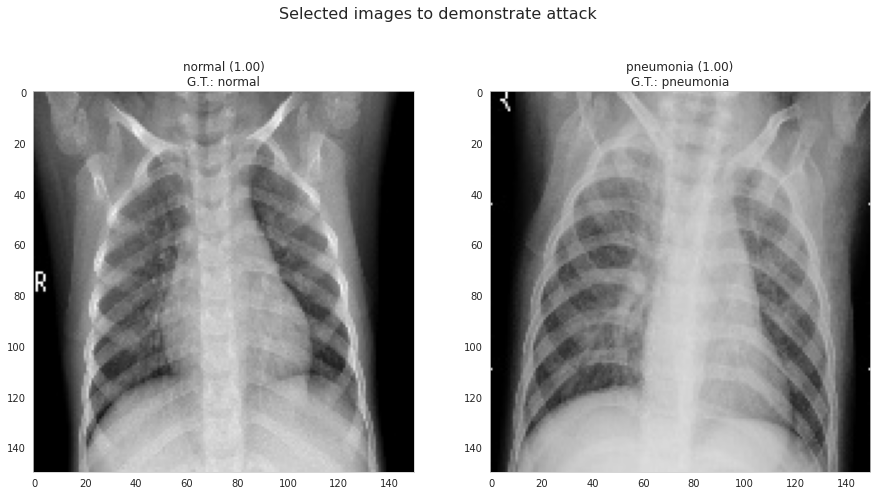

In [19]:
plot_images(images_for_adv, 2, 1, "Selected images to demonstrate attack", model=model, targets=None, gt=[class_list[np.argmax(x)] for x in y_for_adv])

See how the model is pretty sure that the images belong to their true class? This is perfect for us, because we want attack the model on images, where it is confident.

#### Save images for physical attack
If you want to save these images for a later usage in the physical attack tutorial or detector tutorial, comment out the next cell

In [ ]:
for i, img in enumerate(images_for_adv):
    plt.imsave(f"./physical_attack_data/imgs_gui/{class_list[i]}.jpg", img)

for i, img in enumerate(images_for_adv):
    plt.imsave(f"./detector_data/imgs/org/{class_list[i]}.jpg", img)

### Labels for untargeted attack
For an untargeted attack, the labels correspond to their true labels.

In [20]:
x = np.array(images_for_adv)
y_untargeted = np.array(y_for_adv)
print(y_untargeted)

[[1. 0.]
 [0. 1.]]


### Labels for targeted attack

In [21]:
target_list = [class_list.index("pneumonia") if i in [0] 
               else class_list.index("normal") for i in np.argmax(y_untargeted, axis=1)]
y_targeted = keras.utils.to_categorical(target_list, 2)
print(y_targeted)

[[0. 1.]
 [1. 0.]]


Now we finally get to the exciting part!

___
## Using FGSM

### Untargeted Attack
Let's start with an untargeted FGSM attack by first instatiating the attack class.

In [22]:
# instantiate class
fgm_attack = FastGradientMethod(classifier=model, minimal=True, eps_step=0.001, eps=0.01, targeted=False)

#### Minimal-Step method
Settings:
- targeted = false
- $\epsilon_{step}$ = 0.001
- $\epsilon$ = 0.01

The maximum number of times that noise can be added to the image is ten.

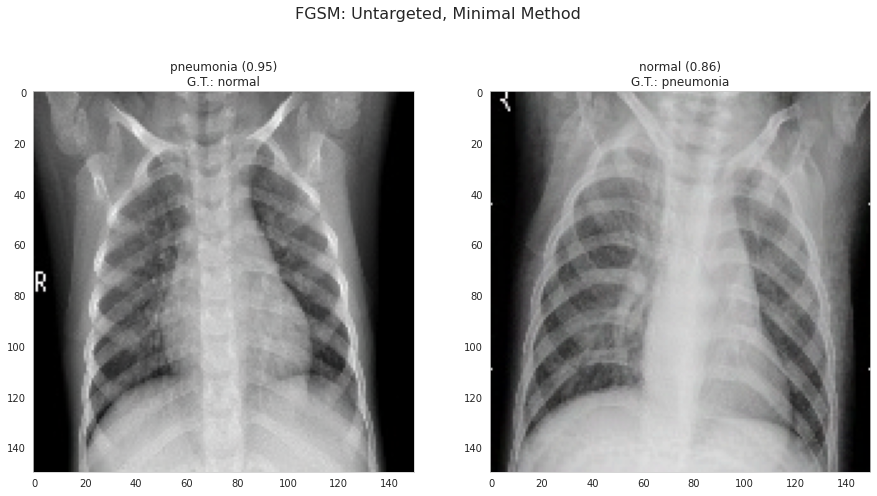

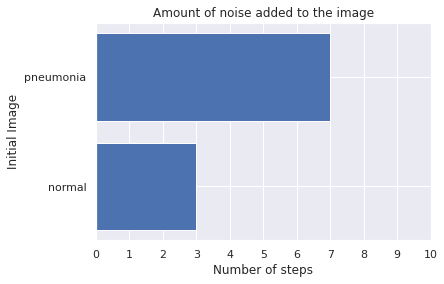

In [23]:
adv_x, n_steps = fgm_attack.generate(x_org=x, targets=y_untargeted)
plot_images(adv_x, 2, 1, title="FGSM: Untargeted, Minimal Method", model=model, gt=[class_list[np.argmax(x)] for x in y_for_adv])
plot_bar(fgm_attack.eps, fgm_attack.eps_step, n_steps, gt=[class_list[np.argmax(x)] for x in y_for_adv])

#### One-step method


Settings:
- targeted = false
- $\epsilon$ = 0.006



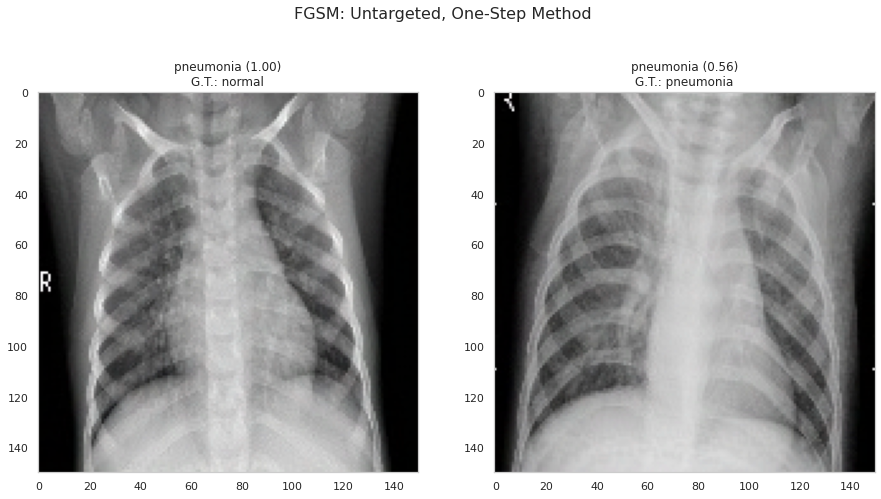

In [24]:
fgm_attack.set_params(minimal=False, eps=0.006)
adv_x = fgm_attack.generate(x_org=x, targets=y_untargeted)
plot_images(adv_x, 2, 1, title="FGSM: Untargeted, One-Step Method", model=model, gt=[class_list[np.argmax(x)] for x in y_for_adv])

### Targeted attack
#### Minimal-Step method
Because we expect the targeted attack to be more difficult, increase the parameters.

Settings:
- targeted = true
- $\epsilon$ = 0.1
- $\epsilon_{step}$ = 0.01

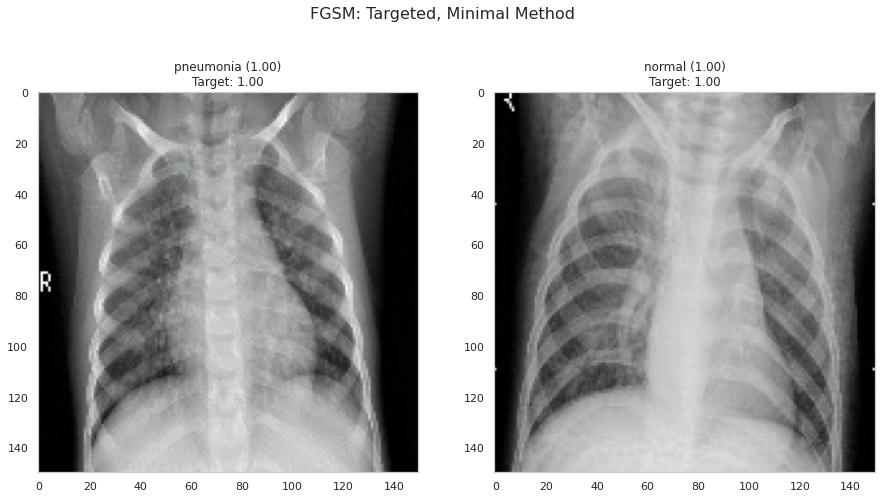

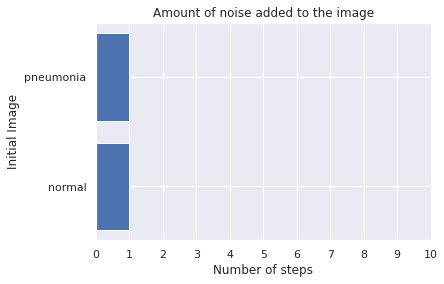

In [25]:
fgm_attack.set_params(minimal=True, eps=0.1, eps_step=0.01, targeted=True)
adv_x, n_steps = fgm_attack.generate(x_org=x, targets=y_targeted)
plot_images(adv_x, 2, 1, title="FGSM: Targeted, Minimal Method", model=model, targets=y_targeted)
plot_bar(fgm_attack.eps, fgm_attack.eps_step, n_steps, gt=[class_list[np.argmax(x)] for x in y_for_adv])

#### One-step method

Settings:
- targeted = true
- $\epsilon$ = 0.1

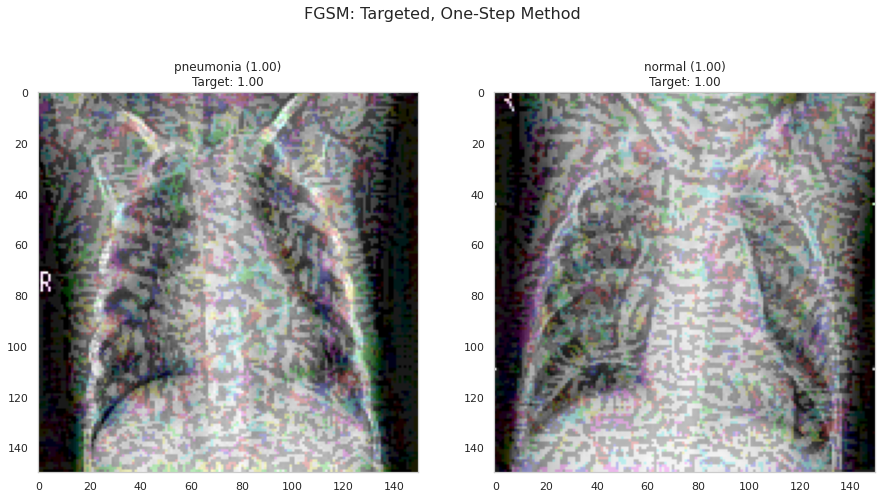

In [26]:
fgm_attack.set_params(minimal=False, eps=0.1, targeted=True)
adv_x = fgm_attack.generate(x_org=x, targets=y_targeted)
plot_images(adv_x, 2, 1, title="FGSM: Targeted, One-Step Method", model=model, targets=y_targeted)

___
## Using PGD
Let's see if the PGD method performs better than the FGSM. For comparability, use the same parameters like above.

In [27]:
# instantiate class
pgd_attack = ProjectedGradientDescent(model, max_iter=10, eps_step=0.001, eps=0.01, targeted=False)

### Untargeted

Settings:
- targeted = false
- $\epsilon$ = 0.01
- $\epsilon_{step}$ = 0.001
- max_iter = 10

  0%|          | 0/10 [00:00<?, ?it/s]

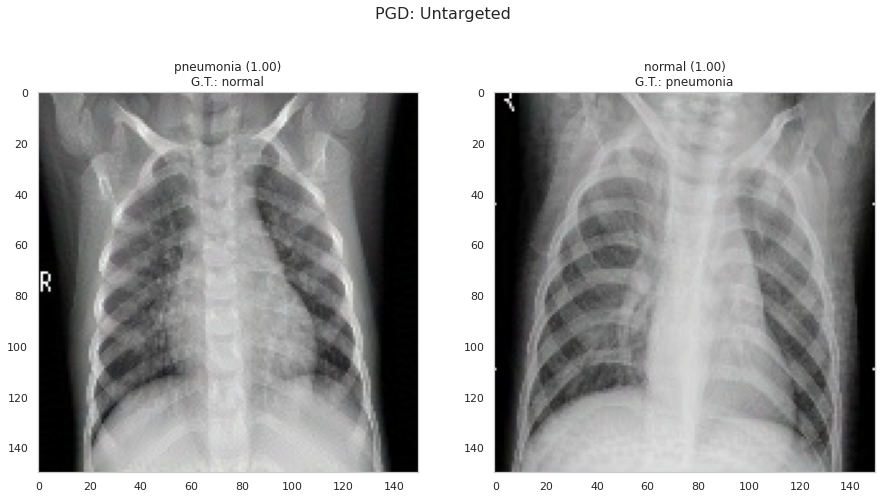

In [28]:
adv_x = pgd_attack.generate(x_org=x, targets=y_untargeted)
plot_images(adv_x, 2, 1, title="PGD: Untargeted", model=model, gt=[class_list[np.argmax(x)] for x in y_for_adv])

### Targeted
Remember, the FGSM attack was only successful in two images with these settings:
- targeted = true
- $\epsilon$ = 0.1
- $\epsilon_{step}$ = 0.01
- max_iter = 40

  0%|          | 0/40 [00:00<?, ?it/s]

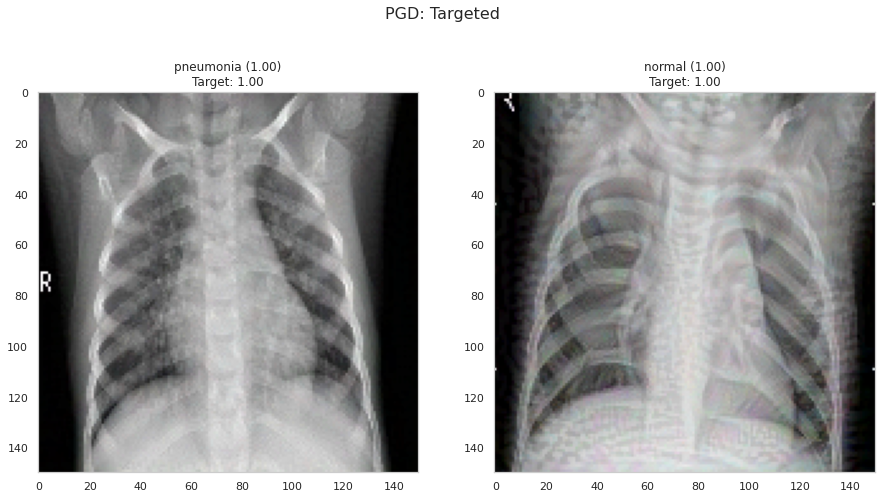

In [29]:
pgd_attack.set_params(max_iter=40, eps=0.1, eps_step=0.01, targeted=True)
adv_x = pgd_attack.generate(x_org=x, targets=y_targeted)
plot_images(adv_x, 2, 1, title="PGD: Targeted", model=model, targets=y_targeted)

### Targeted: Decrease epsilon
Decrease $\epsilon$ from $0.1$ to $0.03$ and $\epsilon_{step}$ from $0.01$ to $0.001$. So the parameters are:

- targeted = true
- $\epsilon$ = 0.03
- $\epsilon_{step}$ = 0.001
- max_iter = 40

  0%|          | 0/40 [00:00<?, ?it/s]

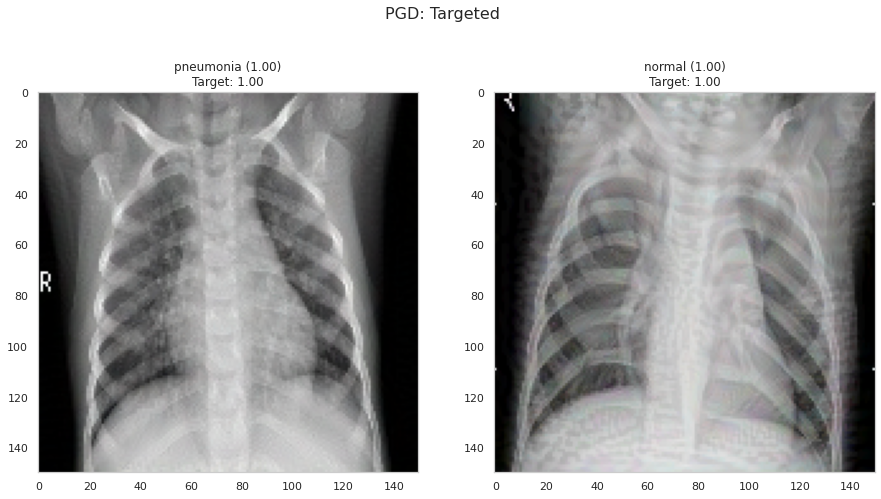

In [30]:
pgd_attack.set_params(max_iter=40, eps=0.03, eps_step=0.001, targeted=True)
adv_x = pgd_attack.generate(x_org=x, targets=y_targeted)
plot_images(adv_x, 2, 1, title="PGD: Targeted", model=model, targets=y_targeted)

### Plot the noise 
Let's take the results from the last attack and plot the noise.
Subtract the adversarial images from the original images and scale the differences between $0$ and $1$ by extracting the minimum and maximum value of all noise-images. This gives you the noise in a valid image range.

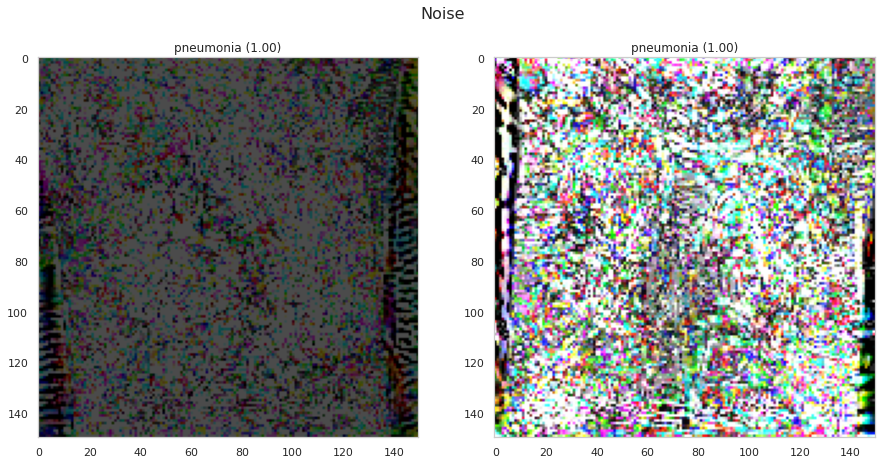

In [31]:
noise = np.abs(x-adv_x)
max_n = max(noise.flatten())
min_n = min(noise.flatten())
noise = (noise-min_n)/(max_n-min_n)
plot_images(noise, 2, 1, title="Noise", model=model, size=(15, 7))

#### Save attack images for detector example
For further usage you can save the images.

In [ ]:
for i, img in enumerate(adv_x):
    plt.imsave(f"./detector_data/imgs/attack/{class_list[i]}.jpg", img)

___
## Validation on Complete Test Dataset


### Untargeted attack
First, do an untargeted attack on the 5000 images. Set $\epsilon = 0.01$ for both methods.

#### FGSM
- targeted = false
- $\epsilon$ = 0.01

In [32]:
# fgsm untargeted on all test images
# instantiate class
fgm_attack = FastGradientMethod(model, eps=0.01, minimal=False, targeted=False)

adv_all_fgm_untargeted = []
start = time.time()

for i in trange(0, (len(x_test)-78)+1, 78):
    adv_x = fgm_attack.generate(x_org=x_test[i:i+78], targets=y_test[i:i+78])
    adv_all_fgm_untargeted.append(adv_x)
    
print(f"Attack done in: {time.time()-start:.2f}  seconds.")
adv_all_fgm_untargeted = np.array(adv_all_fgm_untargeted).reshape(-1, w, h, d)
print(f"Success rate of the attack: {1- model.evaluate(adv_all_fgm_untargeted, y_test)[1]}")

  0%|          | 0/8 [00:00<?, ?it/s]

Attack done in: 13.74  seconds.
624/624 [==============================] - 3s 5ms/step
Success rate of the attack: 0.7980769276618958


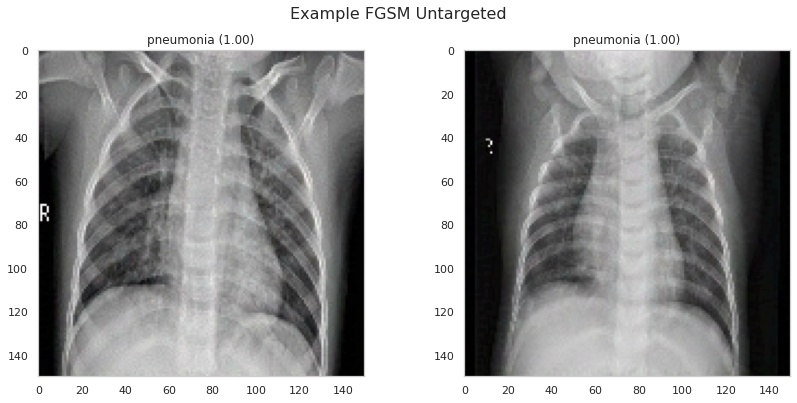

In [33]:
# plot some results
idx = np.random.randint(0, len(adv_all_fgm_untargeted)-2)
plot_images(adv_all_fgm_untargeted[idx:idx+2], 2, 1, title="Example FGSM Untargeted ", model=model, size=(14, 6))

#### PGD
- targeted = false
- $\epsilon$ = 0.01
- $\epsilon_{step}$ = 0.001
- max_iter = 10

In [34]:
# pgd untargeted on all test images
# instantiate class
pgd_attack = ProjectedGradientDescent(model, max_iter=10, eps=0.01, eps_step=0.001)

adv_all_pgd_untargeted = []
start = time.time()

for i in trange(0, (len(x_test)-78)+1, 78):
    adv_x = pgd_attack.generate(x_org=x_test[i:i+78], targets=y_test[i:i+78], verbose=False)
    adv_all_pgd_untargeted.append(adv_x)
    
print(f"Attack done in: {time.time()-start:.2f}  seconds.")
adv_all_pgd_untargeted = np.array(adv_all_pgd_untargeted).reshape(-1, w, h, d)
print(f"Success rate of the attack: {1- model.evaluate(adv_all_pgd_untargeted, y_test)[1]}")

  0%|          | 0/8 [00:00<?, ?it/s]

Attack done in: 64.11  seconds.
624/624 [==============================] - 3s 5ms/step
Success rate of the attack: 0.8910256400704384


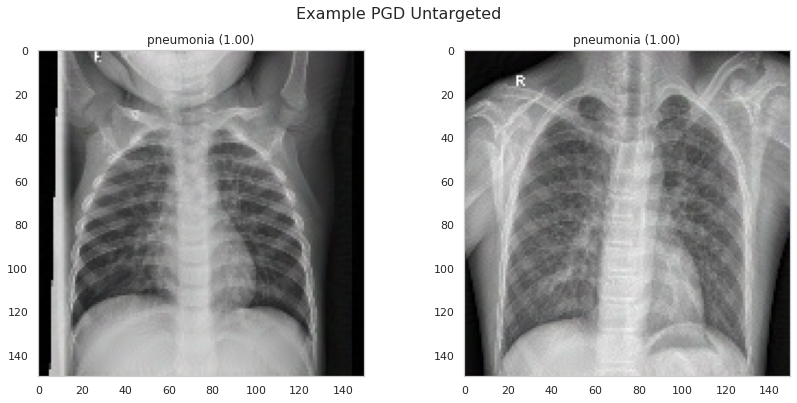

In [36]:
# plot some results
idx = np.random.randint(0, len(adv_all_pgd_untargeted)-2)
plot_images(adv_all_pgd_untargeted[idx:idx+2], 2, 1, title="Example PGD Untargeted ", model=model, size=(14, 6))

### Targeted
Set $\epsilon = 0.03$ for both methods. A attack is only considered to be successful if the model predicts the target class. If the model predicts anything but the ground truth, this is will not count as success.

#### First iterate over the test labels and store our target label for each image

In [37]:
print(y_test.shape)

(624, 2)


In [39]:
adv_targets = []
class_should_be_pneumonia = [0]

for y in y_test:
    dummy_label = np.zeros((1, 2))
    if np.argmax(y) in class_should_be_pneumonia:
        dummy_label[0, class_list.index("pneumonia")] = 1
        adv_targets.append(dummy_label)
    else:
        dummy_label[0, class_list.index("normal")] = 1
        adv_targets.append(dummy_label)

adv_targets = np.array(adv_targets).reshape(-1, num_classes)
print(adv_targets.shape)

(624, 2)


Now, create the attack images.
#### FGSM
- targeted = true
- $\epsilon$ = 0.03

In [40]:
# fgsm targeted on all test images
# instantiate class
fgm_attack = FastGradientMethod(model, eps=0.03, minimal=False, targeted=True)
adv_all_fgm = []
start = time.time()

for i in trange(0, (len(x_test)-78)+1, 78):
    adv_x = fgm_attack.generate(x_org=x_test[i:i+78], targets=adv_targets[i:i+78])
    adv_all_fgm.append(adv_x)
    
print(f"Attack done in: {time.time()-start:.2f}  seconds.")
adv_all_fgm = np.array(adv_all_fgm).reshape(-1, w, h, d)
print(f"Success rate of the attack: {model.evaluate(adv_all_fgm, adv_targets)[1]}")

  0%|          | 0/8 [00:00<?, ?it/s]

Attack done in: 6.81  seconds.
624/624 [==============================] - 3s 5ms/step
Success rate of the attack: 0.9310897588729858


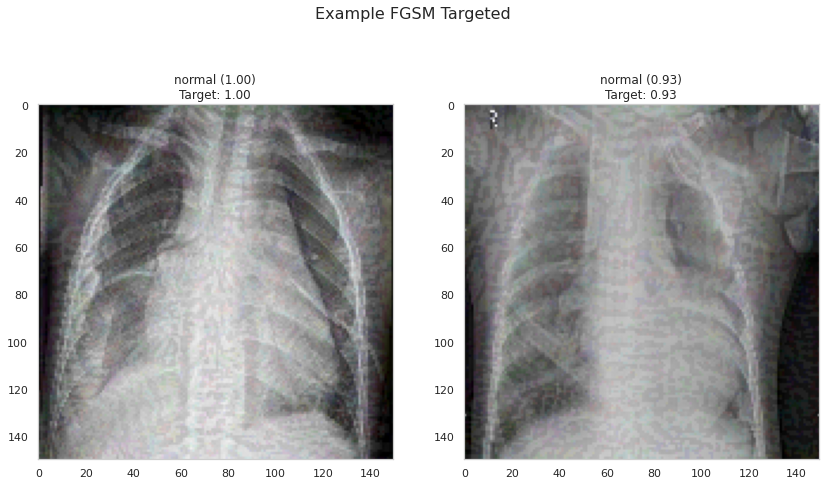

In [42]:
#plot some examples
idx = np.random.randint(0, len(adv_all_fgm)-2)
plot_images(adv_all_fgm[idx:idx+2], 2, 1, title="Example FGSM Targeted ", model=model, size=(14, 8), targets=adv_targets[idx:idx+2])

#### PGD
- targeted = true
- $\epsilon$ = 0.03
- $\epsilon_{step}$ = 0.001
- max_iter = 40

In [43]:
# pgd targeted on all test images. THIS TAKES SOME TIME
# instantiate class
pgd_attack = ProjectedGradientDescent(model, max_iter=40, eps=0.03, eps_step=0.001, targeted=True)

adv_all_pgd = []
start = time.time()

for i in trange(0, (len(x_test)-78)+1, 78):
    adv_x = pgd_attack.generate(x_org=x_test[i:i+78], targets=adv_targets[i:i+78], verbose=False)
    adv_all_pgd.append(adv_x)
    
print(f"Attack done in: {time.time()-start:.2f}  seconds.")
adv_all_pgd = np.array(adv_all_pgd).reshape(-1, w, h, d)
print(f"Success rate of the attack: {model.evaluate(adv_all_pgd, adv_targets)[1]}")

  0%|          | 0/8 [00:00<?, ?it/s]

Attack done in: 253.05  seconds.
624/624 [==============================] - 3s 5ms/step
Success rate of the attack: 1.0


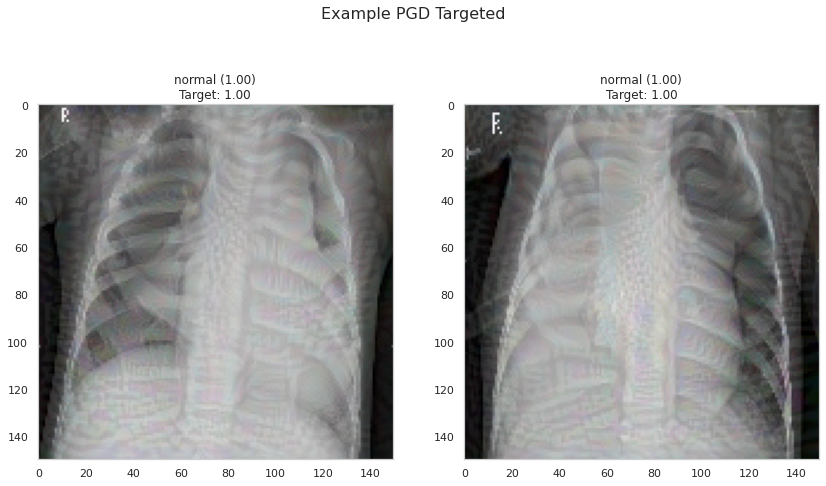

In [44]:
#plot some examples
idx = np.random.randint(0, len(adv_all_pgd)-2)
plot_images(adv_all_pgd[idx:idx+2], 2, 1, title="Example PGD Targeted ", model=model, size=(14, 8), targets=adv_targets[idx:idx+2])